In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt



Matplotlib is building the font cache; this may take a moment.


In [2]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2*(i//2))/np.float32(d_model))
    return pos*angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(start=1, stop=position+1, step=1)[:, np.newaxis], (np.arange(start=0, stop=(2*math.pi)+(2*math.pi/(d_model-1)), step=(2*math.pi/(d_model-1)), dtype=np.float32)[np.newaxis, :]), d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])   #apply sin to even indices in the array; 2i
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])   #apply cos to odd indices in the array; 2i+1
    pos_encoding = angle_rads[np.newaxis, :]
    return pos_encoding

#position is an array from 1 to 16, d_model is an array from 0 to 2*pi with intervals of 2*math.pi/(d_model-1)

In [4]:
tokens = 16
dimensions = 16     #initialize tokens and dimensions


pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)      #print the pos_encoding shape, it should have a (1,16,16) size

(1, 16, 16)


In [19]:
#to test orthogonality, we will use dot_product on matrices of the pos_encoding. If their dot product is not zero, then they are not orthogonal
for i in range(tokens-1):
    orthogonal_test = np.dot(pos_encoding[0][0],pos_encoding[0][i+1])
    print (orthogonal_test)

7.520510899631289
4.438111095828277
1.7759651875892222
1.3552682288048006
2.7997281276135273
3.9519661841211704
2.932391943720498
-0.05978008358628373
-2.866371906619668
-3.306946196737102
-1.1563824029018228
1.6522790887609837
2.785937777009833
1.6161241622264513
-0.2606141797294602


In [10]:
#Now, we will use the Gram-Schmidt method to find the orthogonal and orthonormal basis vectors
#-------orthogonal function--------
#-----------orthogonal and orthonormal functions---------
orthogonal_vector = (tokens, dimensions)
orthogonal_vector = np.zeros(orthogonal_vector)      #I first initialized the orthogonal matrix to zeros with the same size as the pos_encoding
orthogonal_vector = orthogonal_vector[np.newaxis, :]

for i in range(tokens):       #let v be the original matrix, let u be the orthogonal matrix
    orthogonal_vector[0][i] = pos_encoding[0][i]       
    for k in range(i,0,-1):         #u[i] = v[i]-(dot(v[i],u[0])/dot(u[0],u[0]))*u[0] - (dot(v[i],u[1])/dot(u[1],u[1]))*u[1] - ...... - (dot(v[i],u[i-1])/dot(u[i-1],u[i-1]))*u[i-1]
        orthogonal_vector[0][i] = orthogonal_vector[0][i] - ((np.dot(pos_encoding[0][i],orthogonal_vector[0][k-1])/np.dot(orthogonal_vector[0][k-1],orthogonal_vector[0][k-1]))*orthogonal_vector[0][k-1])

In [18]:
#---------orthonormal function--------
orthonormal_vector = (tokens, dimensions)
orthonormal_vector = np.zeros(orthonormal_vector)   #initialized the orthonormal matrix to zeros with the same size as the pos_encoding
orthonormal_vector = orthonormal_vector[np.newaxis, :]

for i in range(tokens):
    vector_length = math.sqrt(np.dot(orthogonal_vector[0][i], orthogonal_vector[0][i]))     #orthonormal = orthogonal/vector length
    orthonormal_vector[0][i] = orthogonal_vector[0][i]/vector_length

#let's test the orthogonal matrix, if they are zero, then they are orthogonal
for i in range(tokens-1):
    orthogonal_test = np.dot(orthogonal_vector[0][0],orthogonal_vector[0][i+1])
    print (orthogonal_test)


6.106226635438361e-16
-1.8318679906315083e-15
2.4494295480792516e-15
-4.093947403305265e-15
5.578328597655169e-15
-5.748873599387139e-15
7.216582207484873e-16
-1.1661801576495767e-09
-5.064946927146874e-09
-1.4004366277742264e-08
-3.0514155979766144e-08
-5.705520333965097e-08
-9.596653494092777e-08
-1.4943180737247985e-07
-2.191633310388852e-07


In [21]:
#let's test the orthonormal matrix, if they are zero, then they are orthogonal and let's test if all vectors have a length of 1
#let's test the orthogonal matrix, if they are zero, then they are orthogonal
for i in range(tokens-1):
    orthogonal_test = np.dot(orthonormal_vector[0][0],orthonormal_vector[0][i+1])
    print (orthogonal_test)
    
for i in range(tokens-1):
    orthonormal_test = np.linalg.norm(orthonormal_vector[0][i])
    print (orthonormal_test)


1.8388068845354155e-16
-5.551115123125783e-16
2.085137618124122e-15
-1.5404344466674047e-14
1.4772558176723294e-13
-3.078814980739253e-12
2.293954332044379e-08
-2.29390951789199e-08
-2.293889228566215e-08
-2.2938771604419372e-08
-2.293869388880765e-08
-2.293864476143881e-08
-2.2938613619682968e-08
-2.293859296953471e-08
-2.2938577981523878e-08
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999


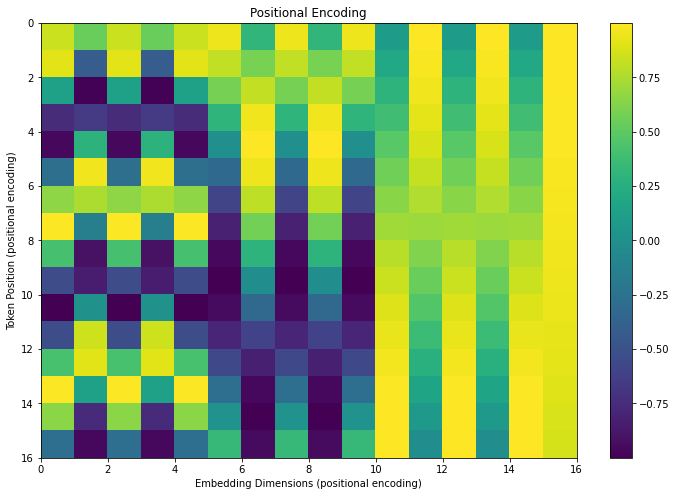

In [25]:
#Let's show the plot of the pos_encoding matrix
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions (positional encoding)')
plt.xlim((0,dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position (positional encoding)')
plt.colorbar()
plt.title("Positional Encoding")
plt.show()

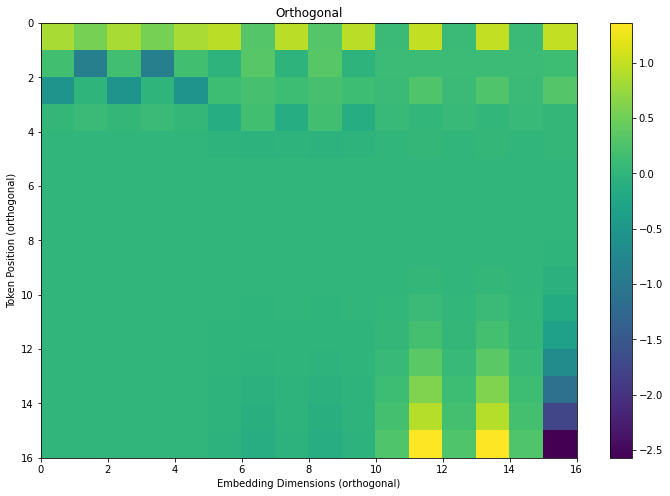

In [26]:
#Let's show the plot of the orthogonal matrix
plt.figure(figsize=(12,8))
plt.pcolormesh(orthogonal_vector[0], cmap='viridis')
plt.xlabel('Embedding Dimensions (orthogonal)')
plt.xlim((0,dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position (orthogonal)')
plt.colorbar()
plt.title("Orthogonal")
plt.show()

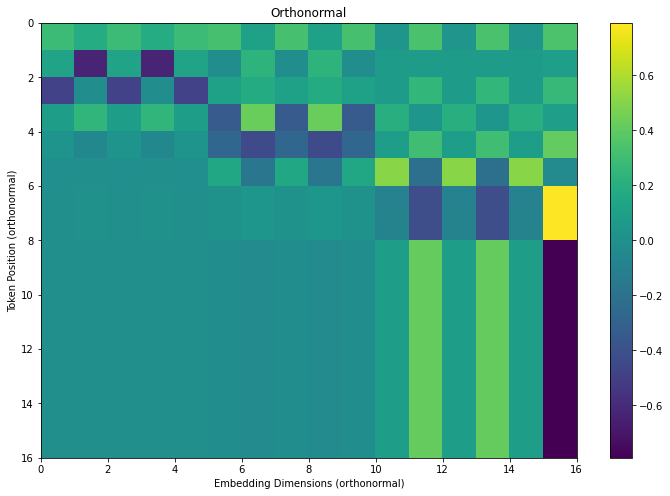

In [27]:
#Let's show the plot of the orthonormal matrix
plt.figure(figsize=(12,8))
plt.pcolormesh(orthonormal_vector[0], cmap='viridis')
plt.xlabel('Embedding Dimensions (orthonormal)')
plt.xlim((0,dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position (orthonormal)')
plt.colorbar()
plt.title("Orthonormal")
plt.show()